# Decision Tree

In [1]:
# References

In [2]:
#Import libs

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [3]:
#Import data and view data
df = pd.read_csv("homework5_input_data.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
X = df.drop(['class'], axis =1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [5]:
X_numeric = pd.get_dummies(X, columns=X.columns, prefix = X.columns)
X_numeric

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [6]:
Y = pd.DataFrame(df['class'])
Y

,class
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [10]:
# X = finalDf.drop(['class'], axis =1).values
scaler = StandardScaler()
X_numeric = scaler.fit_transform(X_numeric.values)

In [11]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6499, 117), (6499, 1), (1625, 117), (1625, 1))

In [12]:
X_train

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [13]:
Y_train

,class
7434,e
7725,e
783,e
1928,e
7466,p
...,...
4931,e
3264,p
1653,e
2607,e


In [14]:
X_test

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ...,  2.47010093,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [15]:
Y_test

,class
380,p
3641,e
273,e
1029,e
684,e
...,...
3535,e
1643,e
6494,p
6,e


In [16]:
model = DecisionTreeClassifier(random_state=0)

# we can first score our model through cross validation (applicable to any supervised model we learn)
cross_val_score(model, X_train, Y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [17]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 1.00


In [18]:
### Individual accuracy
accuracies = cross_val_score(model, X_train, Y_train, cv=5)

print("Individual cross-validation accuracies: ", accuracies)
print("Mean cross validation accuracy: ", accuracies.mean())

Individual cross-validation accuracies:  [1. 1. 1. 1. 1.]
Mean cross validation accuracy:  1.0


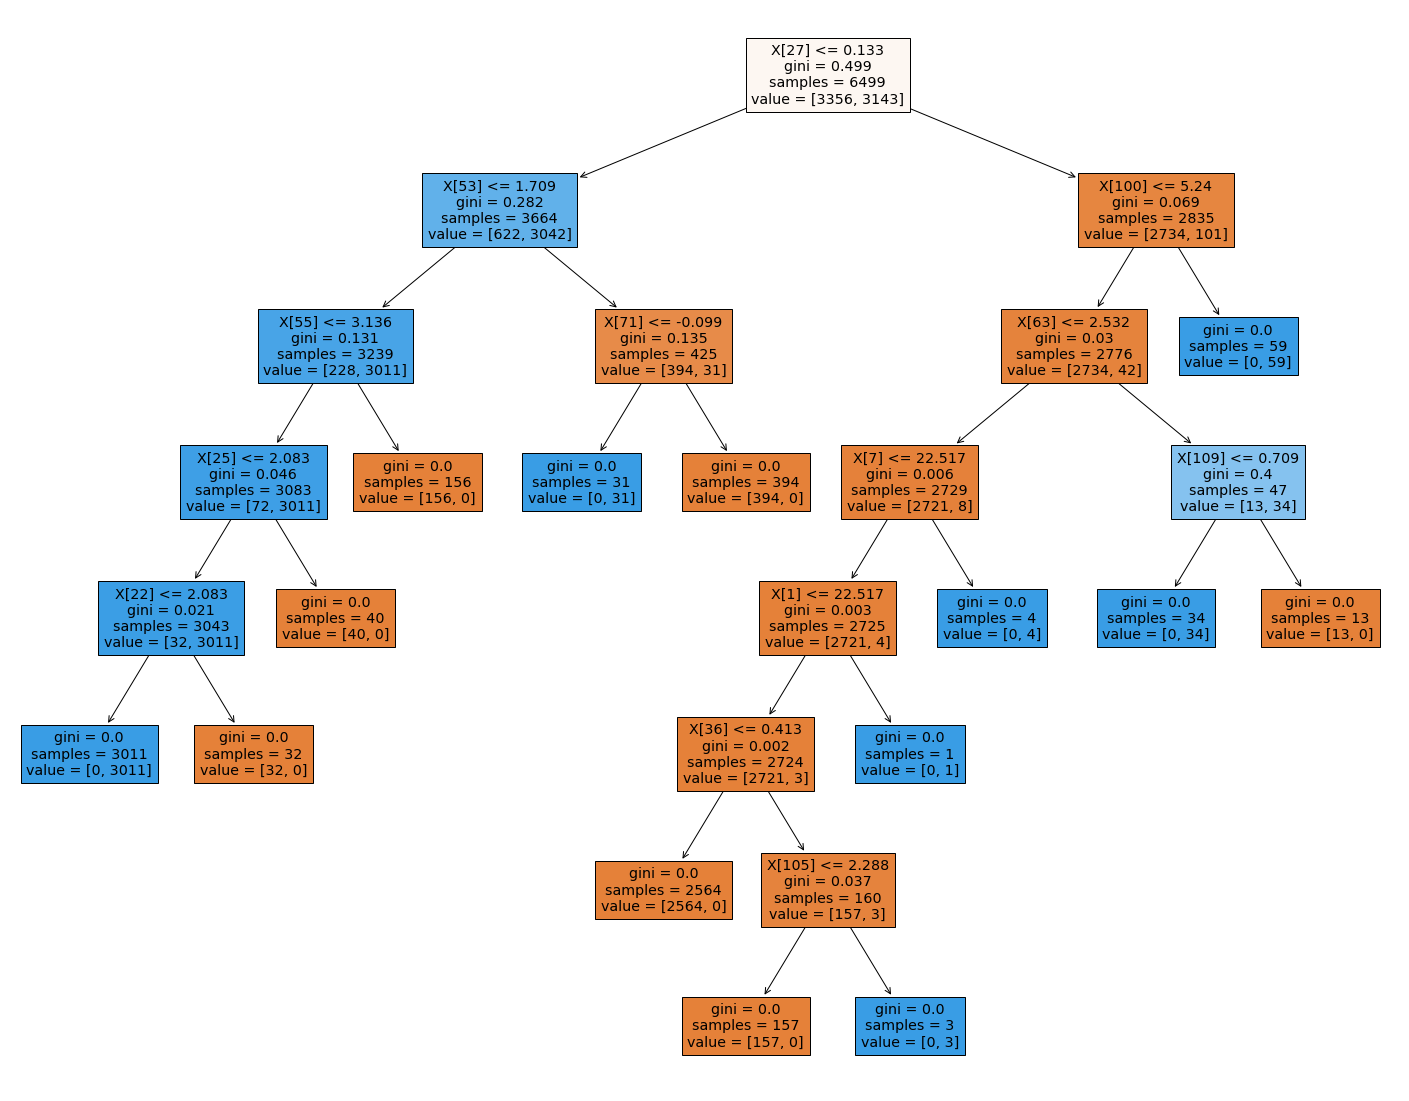

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

Confusion matrix, without normalization
[[852   0]
 [  0 773]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


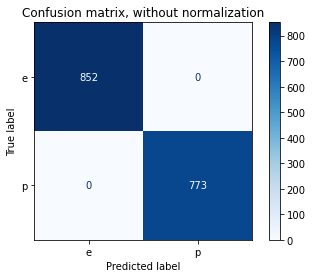

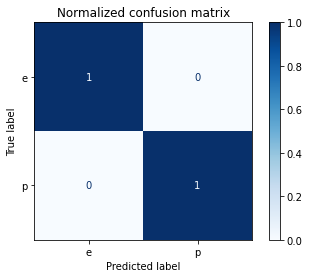

In [21]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=np.unique(Y),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()